<a href="https://colab.research.google.com/github/Valiyantt/CS3F-Elec/blob/main/Group_1_Structured_Equation_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Structured Equation Modeling** (SEM)
- Members: Alverio, Del Rosario, Escueta, Jamillano, Magno, Montalbo, Sayao

## **Initial Procedures**
*   Install and import libraries and import the raw dataset from Kaggle
*   Consolidated 6 .csv files into one .csv file for reading.

In [ ]:
pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 2.7 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659681 sha256=c4dbf4a8336b547a164f6cedfa541f9f74d550dfa70a75d10fc9651204d0169f
  Stored in directory: /root/.cache/pip/wheels/53/ec/0d/0b294c02d8c4e9e80afea58839f2c1b4706770594bc99ec045
Successfully built semopy


In [ ]:
import os
import kagglehub
import numpy as np
import pandas as pd
from semopy import Model

path = kagglehub.dataset_download("abrambeyer/us-hospital-customer-satisfaction-20162020")
print("Path to dataset files:", path)

100%|██████████| 41.0M/41.0M [00:00<00:00, 84.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abrambeyer/us-hospital-customer-satisfaction-20162020/versions/1


In [ ]:
folder_path = "/root/.cache/kagglehub/datasets/abrambeyer/us-hospital-customer-satisfaction-20162020/versions/1"

# Read all CSV files in the folder and combine them
dfs = []  # List to store DataFrames
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Ensure we're only reading CSV files
        file_path = os.path.join(folder_path, file)
        dfs.append(pd.read_csv(file_path))

# Combine all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

<ipython-input-3-2b08519f5760>:8: DtypeWarning: Columns (14,17,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(file_path))
<ipython-input-3-2b08519f5760>:8: DtypeWarning: Columns (0,14,17,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(file_path))


## **Step 1:**  Identify the constructs (latent variable) and observable variables (Indicators) that are part of the model

**Potential Constructs (Latent Variables) and Indicators**
1. *Patient Satisfaction*
- Indicators:
Patient Survey Star Rating
HCAHPS Answer Percent (responses like cleanliness, responsiveness)
2. *Care Quality*
- Indicators:
Effectiveness of care national comparison
Safety of care national comparison
Timeliness of care national comparison

3. *Service Responsiveness*
- Indicators:
Survey Response Rate Percent
Emergency Services
Meets criteria for promoting interoperability of EHRs

## **Step 2:** Specify the relationship between variable (e.g. *direct effect, indirect effects , mediation*)




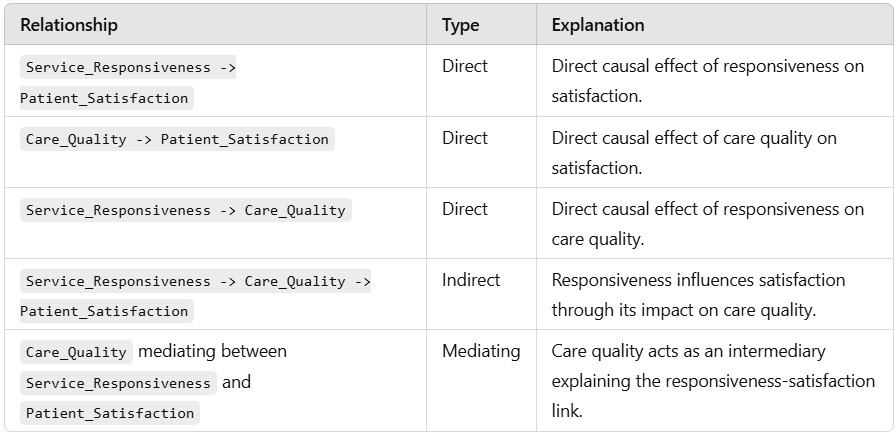



## **Step 3:** Formulate hypotheses that outline the expected relationship among constructs.

**1. Direct Effects**
- H1: Service Responsiveness has a significant positive effect on Patient Satisfaction.
Rationale: Higher responsiveness in service delivery directly improves patients' satisfaction with hospital services.

- H2: Care Quality has a significant positive effect on Patient Satisfaction.
Rationale: Higher quality of care provided by the hospital directly enhances patient satisfaction.

- H3: Service Responsiveness has a significant positive effect on Care Quality.
Rationale: Better responsiveness in services ensures improved care quality through timely and effective interventions.

**2. Indirect Effects**
- H4: Service Responsiveness indirectly influences Patient Satisfaction through Care Quality.
Rationale: The relationship between service responsiveness and satisfaction is mediated by the level of care quality.

**3. Mediation Effects**
- H5: Care Quality mediates the relationship between Service Responsiveness and Patient Satisfaction.
Rationale: Care quality acts as an intermediary mechanism through which responsiveness impacts satisfaction.

## **Step 4:** Specify the measurement model  by identifying which  variables (indicators) measures each latent construct.

**1. Latent Variable: Service_Responsiveness**

*Observed indicators:*

- Survey_Response_Rate
- Emergency_Services
- EHR_Interoperability

*Relationship:*

Service Responsiveness ~ Survey Response Rate, Emergency Services, EHR Interoperability

**2. Latent Variable: Care_Quality**
*Observed indicators:*

- Effectiveness_of_care
- Safety_of_care
- Timeliness_of_care

*Relationship:*

Care Quality ~ Effectiveness of Care, Safety of Care, Timeliness of Care


**3. Latent Variable: Patient_Satisfaction**

*Observed indicators:*

- Patient_Survey_Star_Rating
- HCAHPS_Answer_Percent

*Relationship:*

Patient Satisfaction ~ Patient Survey Star Rating, HCAHPS Answer Percent


## **Step 5:** Define the measurement model , detailing how each latent variables is operationalized through its indicators.

**1. Latent Variable: Service_Responsiveness**

This construct represents how responsive the hospital is to patient needs, operationalized by:
- Survey Response Rate: The percentage of patients who respond to satisfaction surveys, indicating engagement and willingness to provide feedback.
- Emergency Services: Availability and quality of emergency medical services.
- EHR Interoperability: The hospital's ability to share patient data efficiently across electronic health records systems.

*Mathematical Representation:*

Service Responsiveness ~ Survey Response Rate, Emergency Services, EHR Interoperability

**2. Latent Variable: Care_Quality**

This construct captures the quality of care delivered by the hospital, operationalized by:
- Effectiveness of Care: The hospital’s success in achieving desired health outcomes for patients.
- Safety of Care: Measures to minimize errors and harm to patients during healthcare delivery.
- Timeliness of Care: How quickly patients receive care and treatment when needed.

*Mathematical Representation:*

Care Quality ~ Effectiveness of Care, Safety of Care, Timeliness of Care

**3. Latent Variable: Patient_Satisfaction**

This construct reflects the overall satisfaction level of patients with their hospital experience, operationalized by:
- Patient Survey Star Rating: Aggregate star ratings based on patient feedback.
- HCAHPS Answer Percent: Percentage scores from the Hospital Consumer Assessment of Healthcare Providers and Systems survey.

*Mathematical Representation:*

Patient Satisfaction ~ Patient Survey Star Rating, HCAHPS Answer Percent


## **Step 6:** Decide if the indicators are reflective (caused by the latent variable) or formative (forming the latent variable)

For all constructs, the indicators are reflective, meaning:

- Changes in the latent variable cause changes in its indicators.

- Example: Higher Service_Responsiveness leads to better Survey Response Rate, Emergency Services, and EHR Interoperability.

## **Step 7:** Ensure an adequate sample size generally large samples with 10-20 observations per parameter as a rule of thumb

In [ ]:
# Show total number of rows and columns
total_rows, total_columns = combined_df.shape
print(f'Total number of rows: {total_rows}')
print(f'Total number of columns: {total_columns}')

Total number of rows: 1653683
Total number of columns: 43


## **Step 8:** Collect data through surveys, experiments or secondary data sources.

We collected the Dataset from Kaggle titled: **U.S. Hospital Customer Satisfaction. 2016-2020**.

*Reference Link:* https://bit.ly/3CuuLsU

The dataset as given earlier has a total of 1,653,683 responses spanning from the year 2016 - 2020. With this dataset, it would provide a robust resource in which to train the SEM machine.



## **Step 9:** Handle missing data, outlier and asses the data normality
Data Cleaning (Missing Values & Outliers) and Data Standardization

### ***Data Cleaning, Mapping, Handle of Null Values, and Standardization***

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Check for missing values in each column and the entire DataFrame
missing_info = {
    "Column Null Counts": combined_df.isnull().sum(),
    "DataFrame Has Nulls": combined_df.isnull().values.any()
}

for key, value in missing_info.items():
    print(f"{key}: {value}")

Column Null Counts: Facility ID                                                            0
Facility Name                                                          0
Address                                                                0
City                                                                   0
State                                                                  0
ZIP Code                                                               0
County Name                                                         2400
Phone Number                                                           0
HCAHPS Measure ID                                                      0
HCAHPS Question                                                        0
HCAHPS Answer Description                                              0
Patient Survey Star Rating                                             0
Patient Survey Star Rating Footnote                              1576857
HCAHPS Answer Percent          

In [ ]:
# In evaluation of the actual raw datasets, footnotes do not hold any value so will will drop them from the dataset
# We drop also collumns to since they are irrelevant to the analysis process

# List of columns to remove
columns_to_remove = [
    'County Name', 'Phone Number', 'ZIP Code', 'Address',
    'Patient Survey Star Rating Footnote', 'HCAHPS Answer Percent Footnote',
    'Number of Completed Surveys Footnote', 'Survey Response Rate Percent Footnote',
    'Hospital overall rating footnote', 'Mortality national comparison footnote',
    'Safety of care national comparison footnote', 'Readmission national comparison footnote',
    'Patient experience national comparison footnote', 'Effectiveness of care national comparison footnote',
    'Timeliness of care national comparison footnote', 'Efficient use of medical imaging national comparison footnote'
]

# Drop the specified columns
cleaned_df = combined_df.drop(columns=columns_to_remove)

# Drop rows with missing values in 'Meets criteria for promoting interoperability of EHRs'
cleaned_df = cleaned_df.dropna(subset=['Meets criteria for promoting interoperability of EHRs'])

# Print the null information
for key, value in newmissing_info.items():
    print(f"{key}: {value}")

Column Null Counts: Facility ID                                              0
Facility Name                                            0
City                                                     0
State                                                    0
HCAHPS Measure ID                                        0
HCAHPS Question                                          0
HCAHPS Answer Description                                0
Patient Survey Star Rating                               0
HCAHPS Answer Percent                                    0
HCAHPS Linear Mean Value                                 0
Number of Completed Surveys                              0
Survey Response Rate Percent                             0
Start Date                                               0
End Date                                                 0
Year                                                     0
Hospital Type                                            0
Hospital Ownership                  

In [ ]:
# Show total number of rows and columns
total_rows, total_columns = combined_df.shape
print(f'Total number of rows: {total_rows}')
print(f'Total number of columns: {total_columns}')

# Show total number of rows and columns
total_rows, total_columns = cleaned_df.shape
print(f'Total number of rows: {total_rows}')
print(f'Total number of columns: {total_columns}')

Total number of rows: 1653683
Total number of columns: 43
Total number of rows: 1440651
Total number of columns: 27


In [ ]:
# Rename columns for consistency
cleaned_df = cleaned_df.rename(columns={
    "Patient Survey Star Rating": "Patient_Survey_Star_Rating",
    "HCAHPS Answer Percent": "HCAHPS_Answer_Percent",
    "HCAHPS Linear Mean Value": "HCAHPS_Linear_Mean_Value",
    "Number of Completed Surveys": "Number_of_Completed_Surveys",
    "Effectiveness of care national comparison": "Effectiveness_of_care",
    "Safety of care national comparison": "Safety_of_care",
    "Timeliness of care national comparison": "Timeliness_of_care",
    "Survey Response Rate Percent": "Survey_Response_Rate",
    "Emergency Services": "Emergency_Services",
    "Meets criteria for promoting interoperability of EHRs": "EHR_Interoperability"
})

In [ ]:
cleaned_df.head()

,Facility ID,Facility Name,City,State,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient_Survey_Star_Rating,HCAHPS_Answer_Percent,HCAHPS_Linear_Mean_Value,...,Emergency_Services,EHR_Interoperability,Hospital overall rating,Mortality national comparison,Safety_of_care,Readmission national comparison,Patient experience national comparison,Effectiveness_of_care,Timeliness_of_care,Efficient use of medical imaging national comparison
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,H_STAR_RATING,Summary star rating,Summary star rating,2,Not Applicable,Not Applicable,...,Yes,Y,3,Same as the national average,Above the national average,Below the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,"Room was ""always"" clean",Not Applicable,65,Not Applicable,...,Yes,Y,3,Same as the national average,Above the national average,Below the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,"Room was ""sometimes"" or ""never"" clean",Not Applicable,13,Not Applicable,...,Yes,Y,3,Same as the national average,Above the national average,Below the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,H_CLEAN_HSP_U_P,Patients who reported that their room and bath...,"Room was ""usually"" clean",Not Applicable,22,Not Applicable,...,Yes,Y,3,Same as the national average,Above the national average,Below the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,Cleanliness - linear mean score,Not Applicable,Not Applicable,83,...,Yes,Y,3,Same as the national average,Above the national average,Below the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average


In [ ]:
unique_responses = cleaned_df['Safety_of_care'].unique()  # lowercase
print(unique_responses)

['Above the national average' 1 0 'Below the national average'
 'Above the National average' 'Same as the National average'
 'Below the National average']


In [ ]:
# Apply mapping for the data that has rankings.
# Impute specific categorical values of Not Applicable to 3 as a fair score and Not Available as 0
mapping = {
    'Patient_Survey_Star_Rating': {
        'Not Available': 0,
        'Not Applicable': 3
    },
    'HCAHPS_Answer_Percent': {
        'Not Available': 0,
        'Not Applicable': 3
    },
    'HCAHPS_Linear_Mean_Value': {
        'Not Available': 0,
        'Not Applicable': 0
    },
    'Emergency_Services': {
        'Yes': 1,
        'No': 0,
        'Not Available': 0
    },
    'Effectiveness_of_care': {
        'Above the national average': 2,
        'Above the National average': 2,
        'Same as the national average': 1,
        'Same as the National average': 1,
        'Below the national average': 0,
        'Below the National average': 0,
        'Not Available': 0,
        'Not Applicable': 1
    },
    'Safety_of_care': {
        'Above the national average': 2,
        'Above the National average': 2,
        'Same as the national average': 1,
        'Same as the National average': 1,
        'Below the national average': 0,
        'Below the National average': 0,
        'Not Available': 0,
        'Not Applicable': 1
    },
    'Timeliness_of_care': {
        'Above the national average': 2,
        'Above the National average': 2,
        'Same as the national average': 1,
        'Same as the National average': 1,
        'Below the national average': 0,
        'Below the National average': 0,
        'Not Available': 0,
        'Not Applicable': 1
    },
    'EHR_Interoperability': {
        'Y': 1,
        'N': 0,
        'Not Available': 0,
        'Not Applicable': 1
    }
}

# Apply mapping to each relevant column
for column, mappings in mapping.items():
    if column in cleaned_df.columns:  # Ensure the column exists before mapping
        cleaned_df[column] = cleaned_df[column].replace(mappings)

<ipython-input-146-cccb3316339c>:62: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_df[column] = cleaned_df[column].replace(mappings)


In [ ]:
cleaned_df.head()

,Facility ID,Facility Name,City,State,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient_Survey_Star_Rating,HCAHPS_Answer_Percent,HCAHPS_Linear_Mean_Value,...,Emergency_Services,EHR_Interoperability,Hospital overall rating,Mortality national comparison,Safety_of_care,Readmission national comparison,Patient experience national comparison,Effectiveness_of_care,Timeliness_of_care,Efficient use of medical imaging national comparison
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,H_STAR_RATING,Summary star rating,Summary star rating,2,3,3,...,1,1,3,Same as the national average,2,Below the national average,Below the national average,1,1,Same as the national average
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,"Room was ""always"" clean",3,65,3,...,1,1,3,Same as the national average,2,Below the national average,Below the national average,1,1,Same as the national average
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,"Room was ""sometimes"" or ""never"" clean",3,13,3,...,1,1,3,Same as the national average,2,Below the national average,Below the national average,1,1,Same as the national average
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,H_CLEAN_HSP_U_P,Patients who reported that their room and bath...,"Room was ""usually"" clean",3,22,3,...,1,1,3,Same as the national average,2,Below the national average,Below the national average,1,1,Same as the national average
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,Cleanliness - linear mean score,3,3,83,...,1,1,3,Same as the national average,2,Below the national average,Below the national average,1,1,Same as the national average


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns for standardization
numeric_cols = cleaned_df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to numeric columns
cleaned_df[numeric_cols] = scaler.fit_transform(cleaned_df[numeric_cols])

# Verify the results of standardization
print("\nSummary statistics for numeric columns after standardization:")
print(cleaned_df[numeric_cols].describe())

# Display the updated DataFrame shape
print(f"Cleaned DataFrame shape: {cleaned_df.shape}")



Summary statistics for numeric columns after standardization:
               Year  Emergency_Services  EHR_Interoperability  Safety_of_care  \
count  1.440651e+06        1.440651e+06          1.440651e+06    1.440651e+06   
mean   1.498094e-14        6.297299e-17          4.488542e-15    1.363626e-16   
std    1.000000e+00        1.000000e+00          1.000000e+00    1.000000e+00   
min   -1.563424e+00       -4.097237e+00         -9.343564e+01   -7.809596e-01   
25%   -8.650102e-01        2.440669e-01          1.070255e-02   -7.809596e-01   
50%   -1.665967e-01        2.440669e-01          1.070255e-02   -7.809596e-01   
75%    1.230230e+00        2.440669e-01          1.070255e-02    4.045663e-01   
max    1.230230e+00        2.440669e-01          1.070255e-02    1.590092e+00   

       Effectiveness_of_care  Timeliness_of_care  
count           1.440651e+06        1.440651e+06  
mean            6.723432e-17       -1.193172e-16  
std             1.000000e+00        1.000000e+00  
min

In [ ]:
# Show total number of rows and columns
total_rows, total_columns = cleaned_df.shape
print(f'Total number of rows: {total_rows}')
print(f'Total number of columns: {total_columns}')

Total number of rows: 1440651
Total number of columns: 27


### ***Outlier Handling, Data Assessment, and Visualization***

In [ ]:
from scipy.stats import zscore
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler

In [ ]:
# Calculate Z-scores for numeric columns
z_scores = cleaned_df[numeric_cols].apply(zscore)

# Mark rows with Z-score > 3 or < -3 as potential outliers
outliers_z = (z_scores.abs() > 3)

# Count of outliers in each column
outliers_count_z = outliers_z.sum()
print("Number of outliers detected (Z-Score method):")
print(outliers_count_z)

# IQR Method for outlier detection
Q1 = cleaned_df[numeric_cols].quantile(0.25)
Q3 = cleaned_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers as values beyond 1.5*IQR
outliers_iqr = ((cleaned_df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                (cleaned_df[numeric_cols] > (Q3 + 1.5 * IQR)))

outliers_count_iqr = outliers_iqr.sum()
print("\nNumber of outliers detected (IQR method):")
print(outliers_count_iqr)

Number of outliers detected (Z-Score method):
Year                     0
Emergency_Services       0
EHR_Interoperability     0
Safety_of_care           0
Effectiveness_of_care    0
Timeliness_of_care       0
dtype: int64

Number of outliers detected (IQR method):
Year                     0
Emergency_Services       0
EHR_Interoperability     0
Safety_of_care           0
Effectiveness_of_care    0
Timeliness_of_care       0
dtype: int64


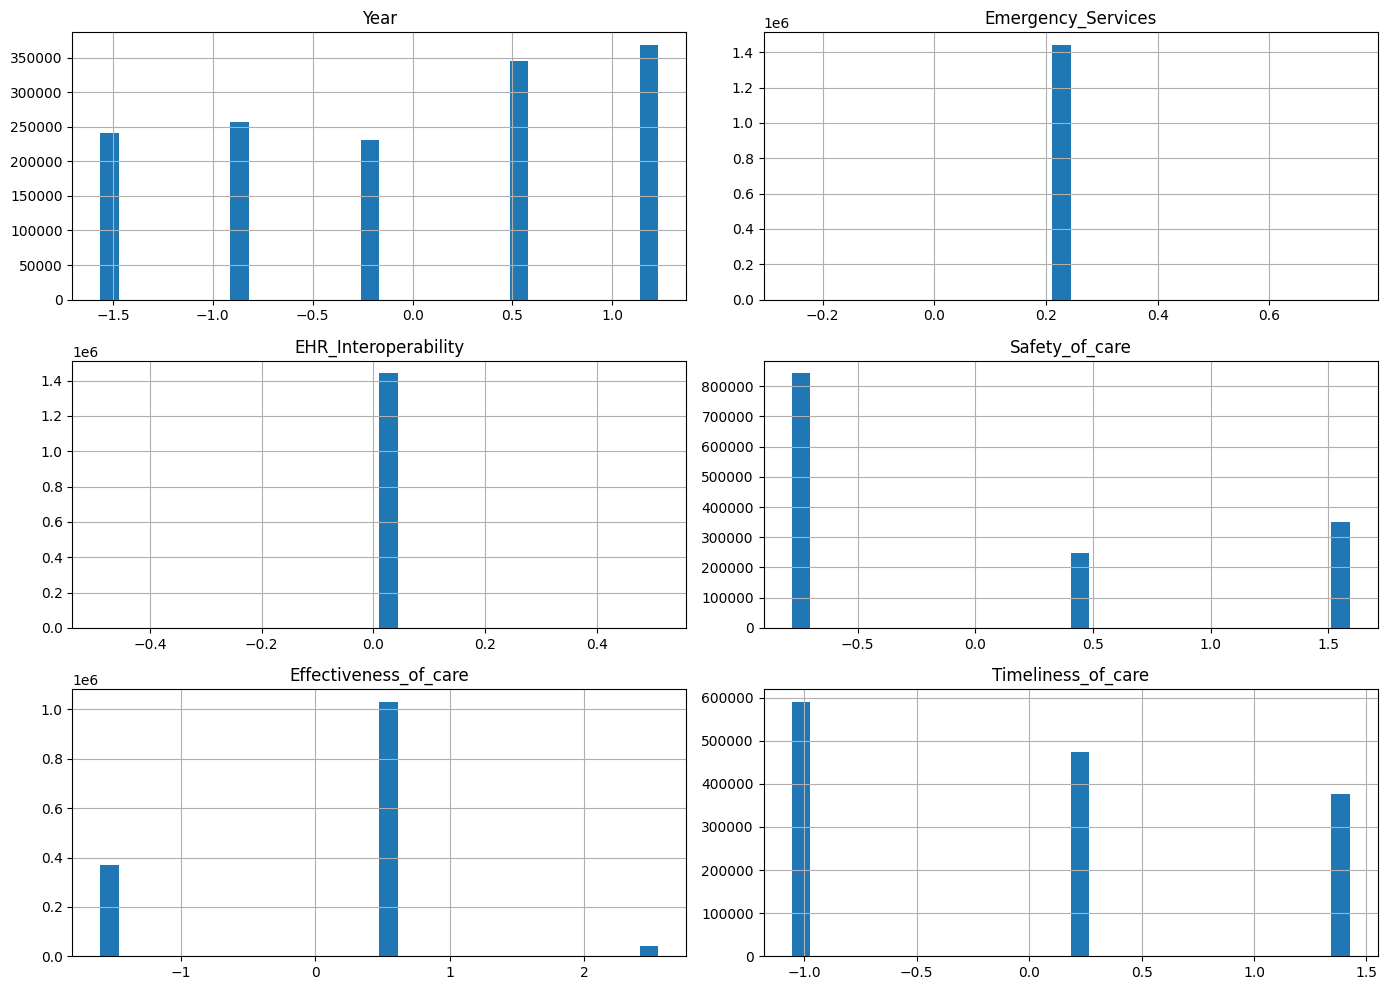

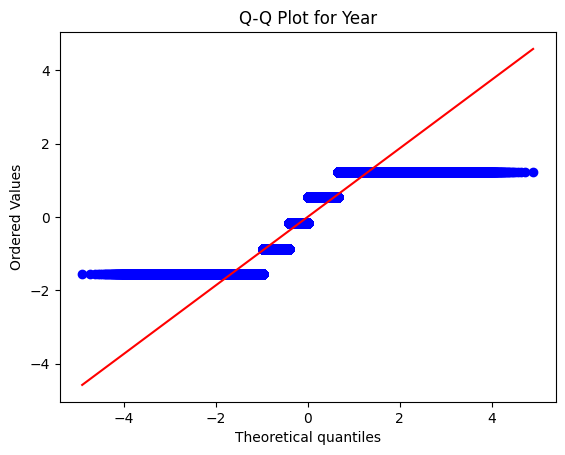

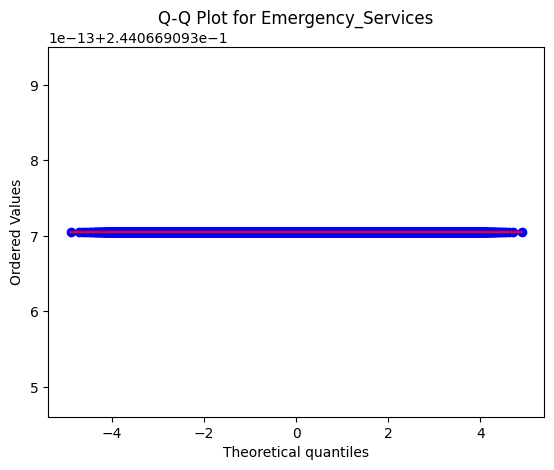

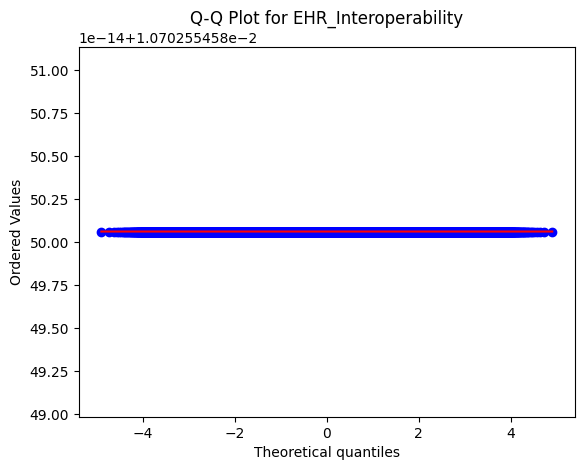

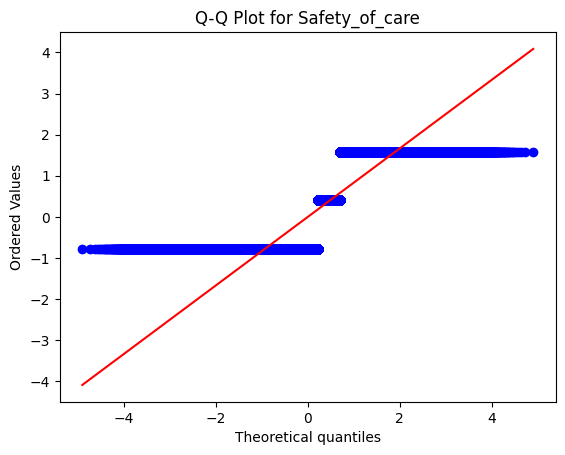

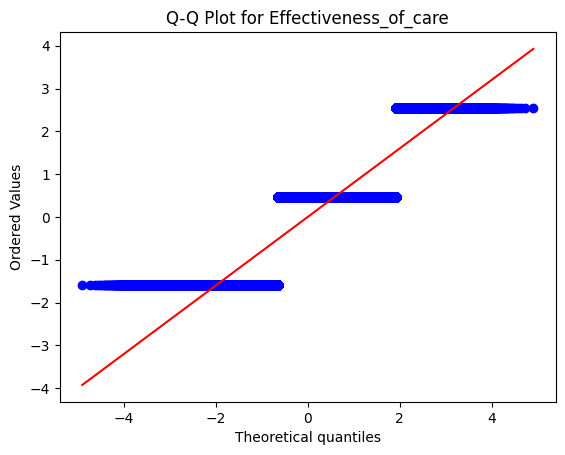

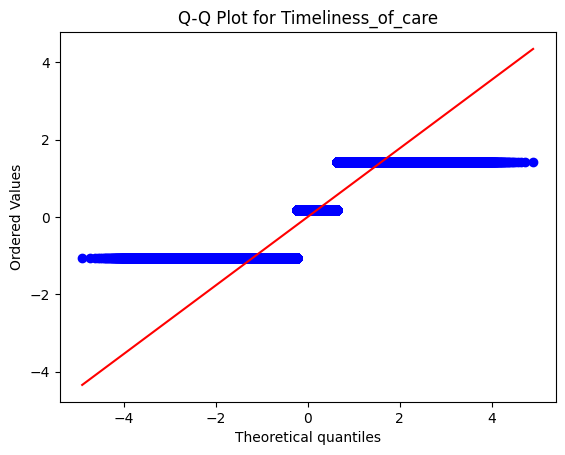

In [ ]:
cleaned_df[numeric_cols].hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()

for col in numeric_cols:
    stats.probplot(cleaned_df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.show()

## **Step 10:** Define the relationship among latent variables , specifying which variables are exogenous (independent) and which are endogenous (dependent)

#================================================================================================================= **In Progress** =================================================================================================================


## **Step 11:** Outline the path relationship, identifying causal. mediating , or moderating paths as needed.

## **Step 12:** Select an Estimation Model which include Maximum likelihood estimation(MLE), Generalized Least Squares (GLS) or Weighted Least Squares (WLS)

##**Step 13:** Run the model using python to estimate the parameters and fit the model.

##**Step 14:** Ensure the goodness of fit for the overall model to see if it adequately represents the data.
The common fit are Chi.Square ; aims for non-significance, indicating the the model is not significantly different from the data, Root Mean Squared Error of Approximation . It should be ideally to be less than 0.06 , Comparative Fit Index and Tucker lewis Index: which the values is close or above 0.95 indicate a good fit. and Standard Root mean Square Residual, it should be less than 0.08 for a good fit.

## **Step 15:** If the model does not fit, You may add or remove paths which is based from the theory or modification indices.

OR improve model specification by specifying error covariances if appropriate and or re-specifying measurement indicators by evaluating whether each indicator is contributing to its contsruct as expected.

## **Step 16:** Examine the significance and strength to understand of each path relationship in the model.

## **Step 17:** Check direct, indirect  and the total effects to understand the relationships between construct.

##**Step 18:** Assess the effect sizes and determine if they support the hypotheses.

##**Step 19:** Calculate Cronbach's alpha and composite reliability to ensure

##**Step 20**: Assess the indicators of a construct correlate highly (Average Variance Extracted)

##**Step 21:** Ensure that the construct are distinct from each other (e.g; average variance extracted for each construct should be greater that the squared correlation with other construct.

##**Step 22:** Interpret the result and test the hypothesis:  Based on the path coefficient and their significance , assess if the data supports each hypothesis.

##**Step 23:** Interpret both the direct and indirect effects to draw insights about the relationship in your model.

##**Step 24:** Report the findings: Present the model specification , fit indices, path coefficient and hypotheses testing result. Include tables and diagrams to illustrate the structural and measurement models as well as any modification made.

##**Step 25:** Discuss implications, limitations and potential areas for future research.

##**Step 26:** This is optional for the robustness of the model . Conduct cross validation by testing the model on a separate sample to check for generability or perform sensitivity analysis or robustness checks to validate the consistency findings